In [1]:
import torch, torchaudio

from models import LSTMClassifier, GRUClassifier, CNN_RNN
from datasets import SoundTracksDataset
from train import MultiClassTrainer
from data_visualisation import plot_spectrogram

In [2]:
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dset = SoundTracksDataset(train=True).to(device)
train_dset, val_dset = dset.train_test_split(0.2)
val_dset, test_dset = val_dset.train_test_split(0.5)

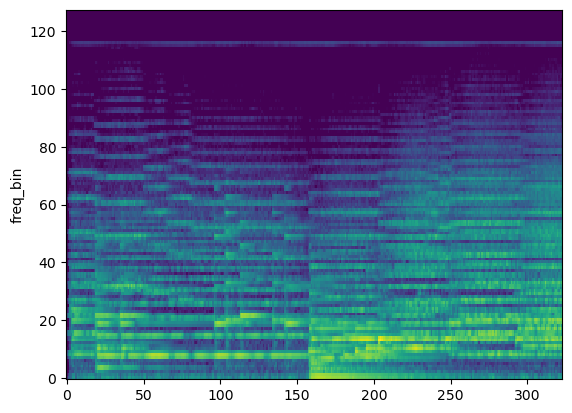

In [3]:
plot_spectrogram(train_dset.melspecs[0].cpu())

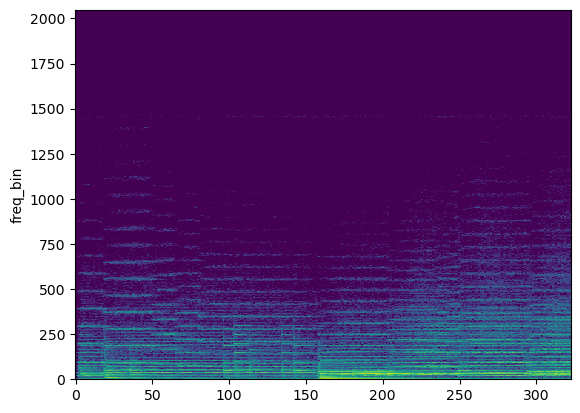

In [4]:
plot_spectrogram(train_dset.spectrograms[0].cpu(), to_db=True)

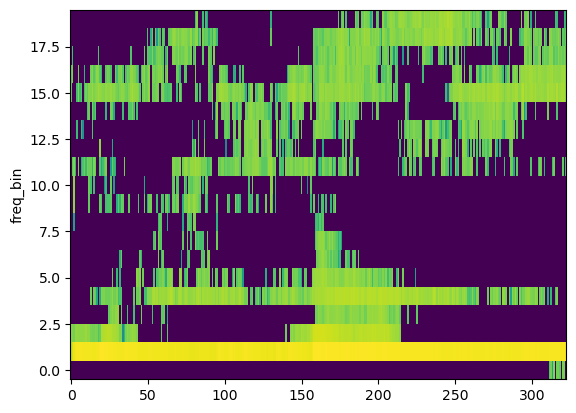

In [5]:
plot_spectrogram(train_dset.mfcc[0].cpu(), to_db=True)

In [6]:
model1 = LSTMClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
).to(device)

print(model1(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model1, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model1, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=15.3608    Train Acc=0.2727    Val Loss=13.9992    Val Acc=0.2727
Epoch 1    Train Loss=13.6303    Train Acc=0.2955    Val Loss=12.2194    Val Acc=0.2273
Epoch 2    Train Loss=12.1270    Train Acc=0.3068    Val Loss=10.9885    Val Acc=0.3636
Epoch 3    Train Loss=10.7827    Train Acc=0.3182    Val Loss=9.8246    Val Acc=0.4091
Epoch 4    Train Loss=9.7085    Train Acc=0.3239    Val Loss=8.9859    Val Acc=0.3182
Epoch 5    Train Loss=8.8276    Train Acc=0.3295    Val Loss=8.0809    Val Acc=0.3636
Epoch 6    Train Loss=8.0763    Train Acc=0.3125    Val Loss=7.3417    Val Acc=0.3182
Epoch 7    Train Loss=7.3982    Train Acc=0.3011    Val Loss=6.6113    Val Acc=0.3182
Epoch 8    Train Loss=6.9385    Train Acc=0.2955    Val Loss=6.1150    Val Acc=0.3182
Epoch 9    Train Loss=6.4437    Train Acc=0.3182    Val Loss=5.7986    Val Acc=0.3182
Epoch 10    Train Loss=5.9558    Train Acc=0.2955    Val Loss=5.4795    Val Acc=0.2273
Epoch 11  

KeyboardInterrupt: 

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=5.7986    Train Acc=0.3125    Val Loss=3.6754    Val Acc=0.5000
Epoch 1    Train Loss=3.1344    Train Acc=0.3409    Val Loss=1.3358    Val Acc=0.7273
Epoch 2    Train Loss=2.6069    Train Acc=0.3352    Val Loss=1.8499    Val Acc=0.6818
Epoch 3    Train Loss=2.0923    Train Acc=0.4091    Val Loss=1.7718    Val Acc=0.6364
Epoch 4    Train Loss=1.8125    Train Acc=0.3693    Val Loss=1.3463    Val Acc=0.5000
Epoch 5    Train Loss=1.7395    Train Acc=0.4034    Val Loss=1.9484    Val Acc=0.2273
Epoch 6    Train Loss=1.5631    Train Acc=0.4034    Val Loss=1.5677    Val Acc=0.4545
Epoch 7    Train Loss=1.4036    Train Acc=0.4091    Val Loss=1.3335    Val Acc=0.4091
Epoch 8    Train Loss=1.2950    Train Acc=0.4489    Val Loss=1.2969    Val Acc=0.4091
Epoch 9    Train Loss=1.2143    Train Acc=0.4261    Val Loss=1.2657    Val Acc=0.4091
Epoch 10    Train Loss=1.1918    Train Acc=0.4716    Val Loss=1.3457    Val Acc=0.4091
Epoch 11    Train

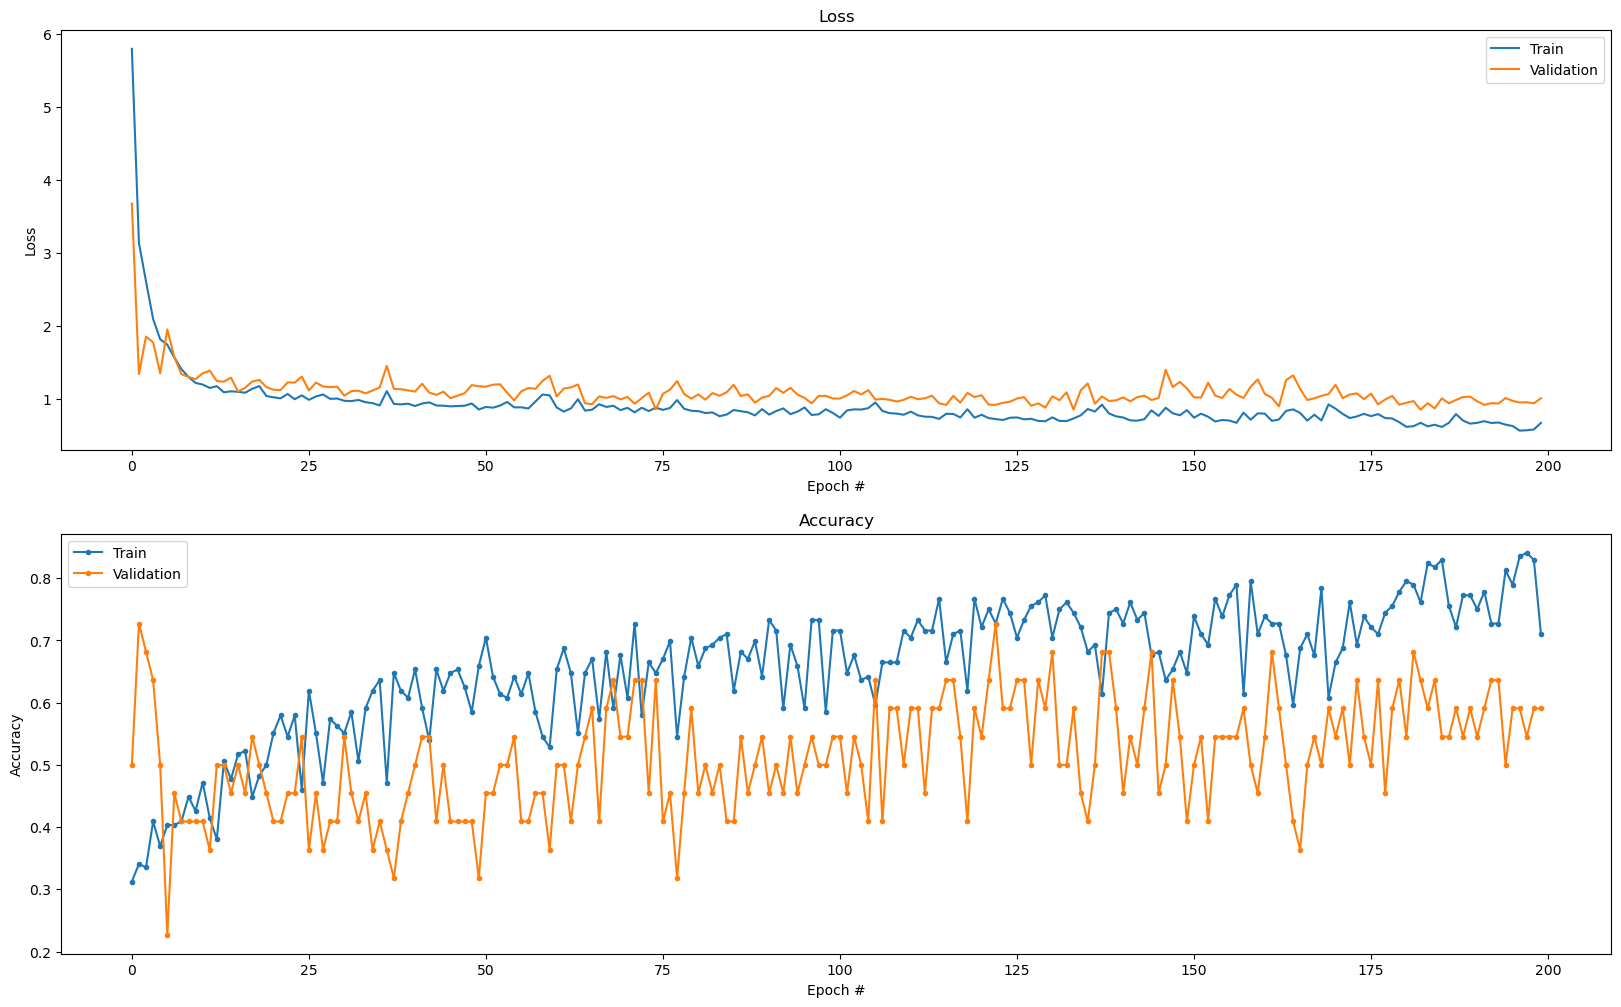

In [ ]:
model2 = LSTMClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
).to(device)

print(model2(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model2, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model2, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=1.9441    Train Acc=0.2898    Val Loss=1.5661    Val Acc=0.3182
Epoch 1    Train Loss=1.6815    Train Acc=0.3182    Val Loss=1.5140    Val Acc=0.2727
Epoch 2    Train Loss=1.4490    Train Acc=0.4034    Val Loss=1.4640    Val Acc=0.3182
Epoch 3    Train Loss=1.2834    Train Acc=0.5170    Val Loss=1.4551    Val Acc=0.2727
Epoch 4    Train Loss=1.1884    Train Acc=0.5739    Val Loss=1.4706    Val Acc=0.2273
Epoch 5    Train Loss=1.0940    Train Acc=0.6420    Val Loss=1.4366    Val Acc=0.2273
Epoch 6    Train Loss=1.0260    Train Acc=0.6648    Val Loss=1.4172    Val Acc=0.1818
Epoch 7    Train Loss=0.9608    Train Acc=0.6989    Val Loss=1.4065    Val Acc=0.1818
Epoch 8    Train Loss=0.9151    Train Acc=0.7443    Val Loss=1.4099    Val Acc=0.1364
Epoch 9    Train Loss=0.8746    Train Acc=0.7670    Val Loss=1.3951    Val Acc=0.1364
Epoch 10    Train Loss=0.8332    Train Acc=0.7841    Val Loss=1.3811    Val Acc=0.1818
Epoch 11    Train

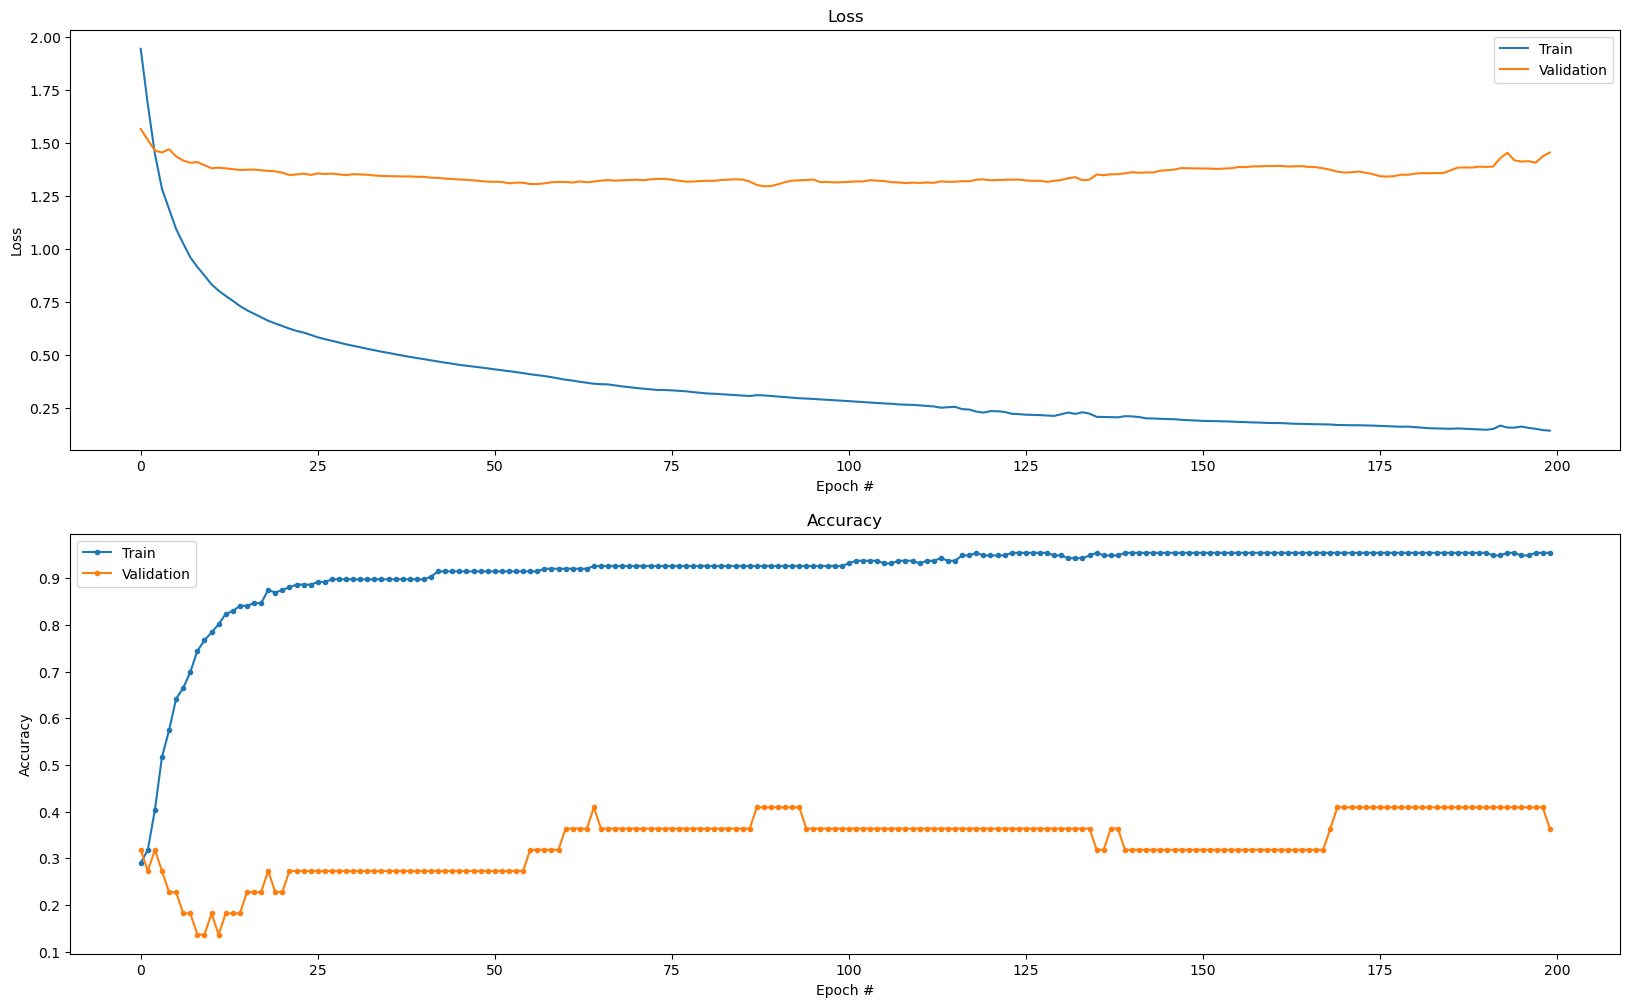

In [ ]:
model3 = LSTMClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
).to(device)

print(model3(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model3, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model3, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=1.3894    Train Acc=0.3125    Val Loss=1.4031    Val Acc=0.2273
Epoch 1    Train Loss=1.3559    Train Acc=0.3409    Val Loss=1.3976    Val Acc=0.2727
Epoch 2    Train Loss=1.3347    Train Acc=0.3693    Val Loss=1.3796    Val Acc=0.3182
Epoch 3    Train Loss=1.3152    Train Acc=0.3977    Val Loss=1.3623    Val Acc=0.4091
Epoch 4    Train Loss=1.2964    Train Acc=0.4034    Val Loss=1.3548    Val Acc=0.4091
Epoch 5    Train Loss=1.2838    Train Acc=0.4375    Val Loss=1.3539    Val Acc=0.3636
Epoch 6    Train Loss=1.2685    Train Acc=0.4773    Val Loss=1.3470    Val Acc=0.4091
Epoch 7    Train Loss=1.2530    Train Acc=0.5057    Val Loss=1.3403    Val Acc=0.4091
Epoch 8    Train Loss=1.2394    Train Acc=0.5170    Val Loss=1.3378    Val Acc=0.4545
Epoch 9    Train Loss=1.2266    Train Acc=0.5511    Val Loss=1.3296    Val Acc=0.4545
Epoch 10    Train Loss=1.2128    Train Acc=0.5795    Val Loss=1.3274    Val Acc=0.5455
Epoch 11    Train

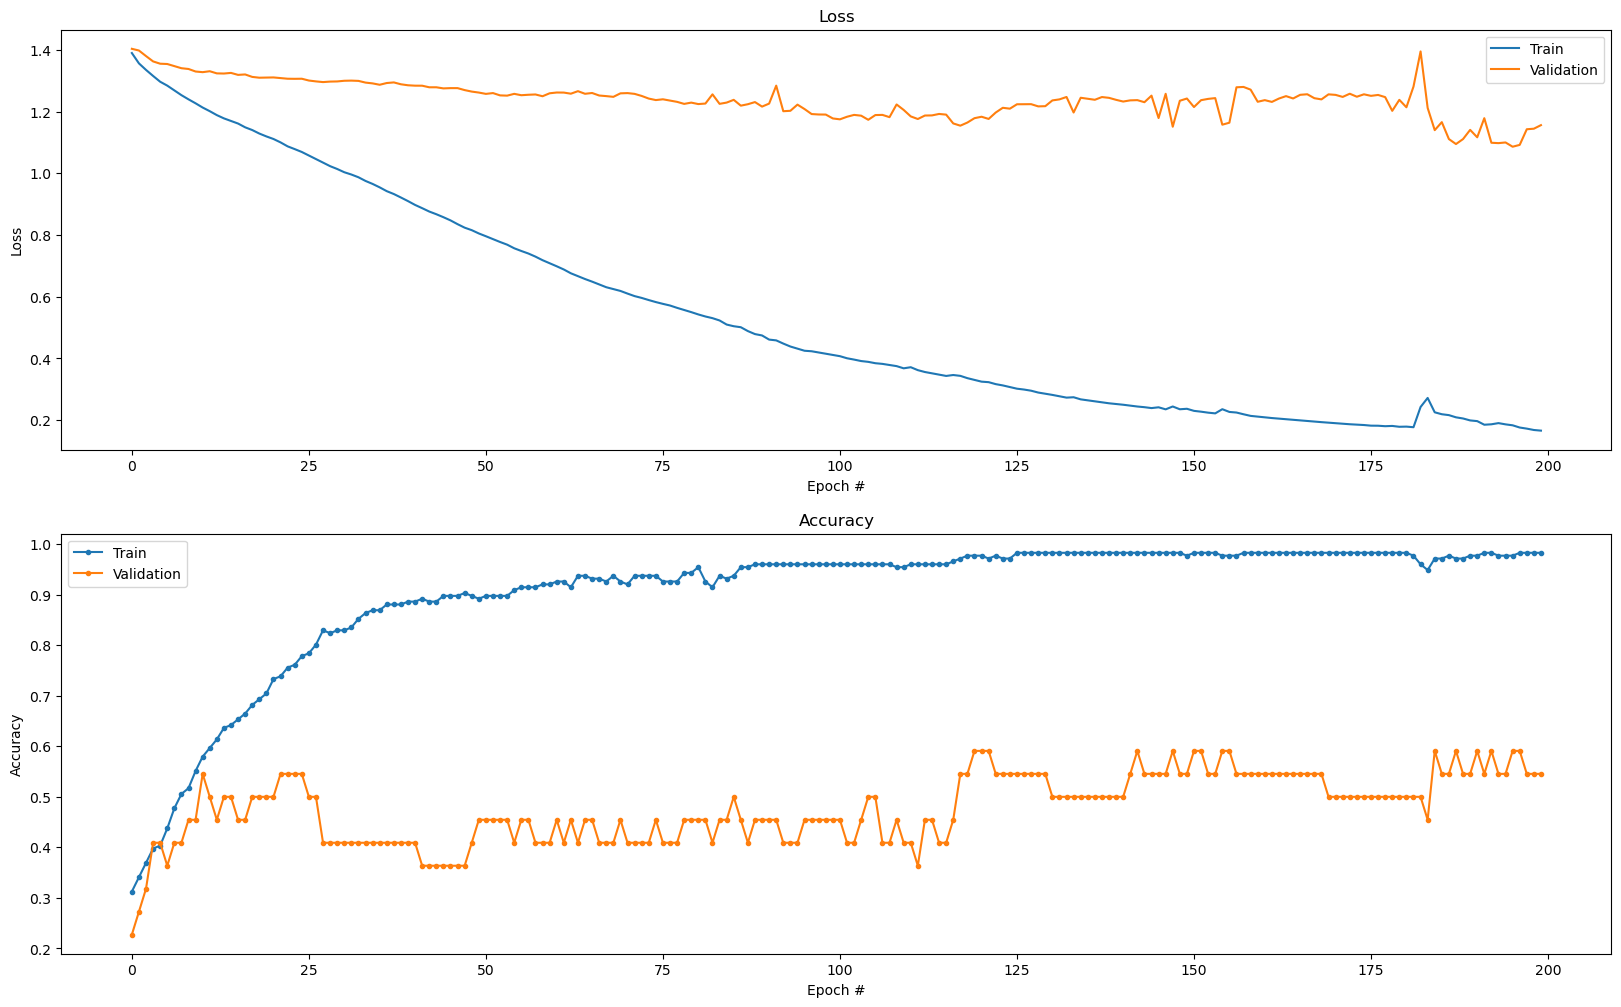

In [ ]:
model4 = GRUClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
).to(device)

print(model4(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model4, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model4, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=1.3920    Train Acc=0.1875    Val Loss=1.3893    Val Acc=0.1364
Epoch 1    Train Loss=1.3815    Train Acc=0.2955    Val Loss=1.3779    Val Acc=0.2273
Epoch 2    Train Loss=1.3692    Train Acc=0.3466    Val Loss=1.3668    Val Acc=0.4545
Epoch 3    Train Loss=1.3650    Train Acc=0.3523    Val Loss=1.3653    Val Acc=0.4545
Epoch 4    Train Loss=1.3607    Train Acc=0.3636    Val Loss=1.3674    Val Acc=0.3182
Epoch 5    Train Loss=1.3585    Train Acc=0.3466    Val Loss=1.3659    Val Acc=0.3182
Epoch 6    Train Loss=1.3594    Train Acc=0.3125    Val Loss=1.3751    Val Acc=0.2273
Epoch 7    Train Loss=1.3504    Train Acc=0.4545    Val Loss=1.3595    Val Acc=0.3636
Epoch 8    Train Loss=1.3468    Train Acc=0.4545    Val Loss=1.3550    Val Acc=0.3636
Epoch 9    Train Loss=1.3443    Train Acc=0.4318    Val Loss=1.3535    Val Acc=0.3636
Epoch 10    Train Loss=1.3424    Train Acc=0.4034    Val Loss=1.3566    Val Acc=0.2273
Epoch 11    Train

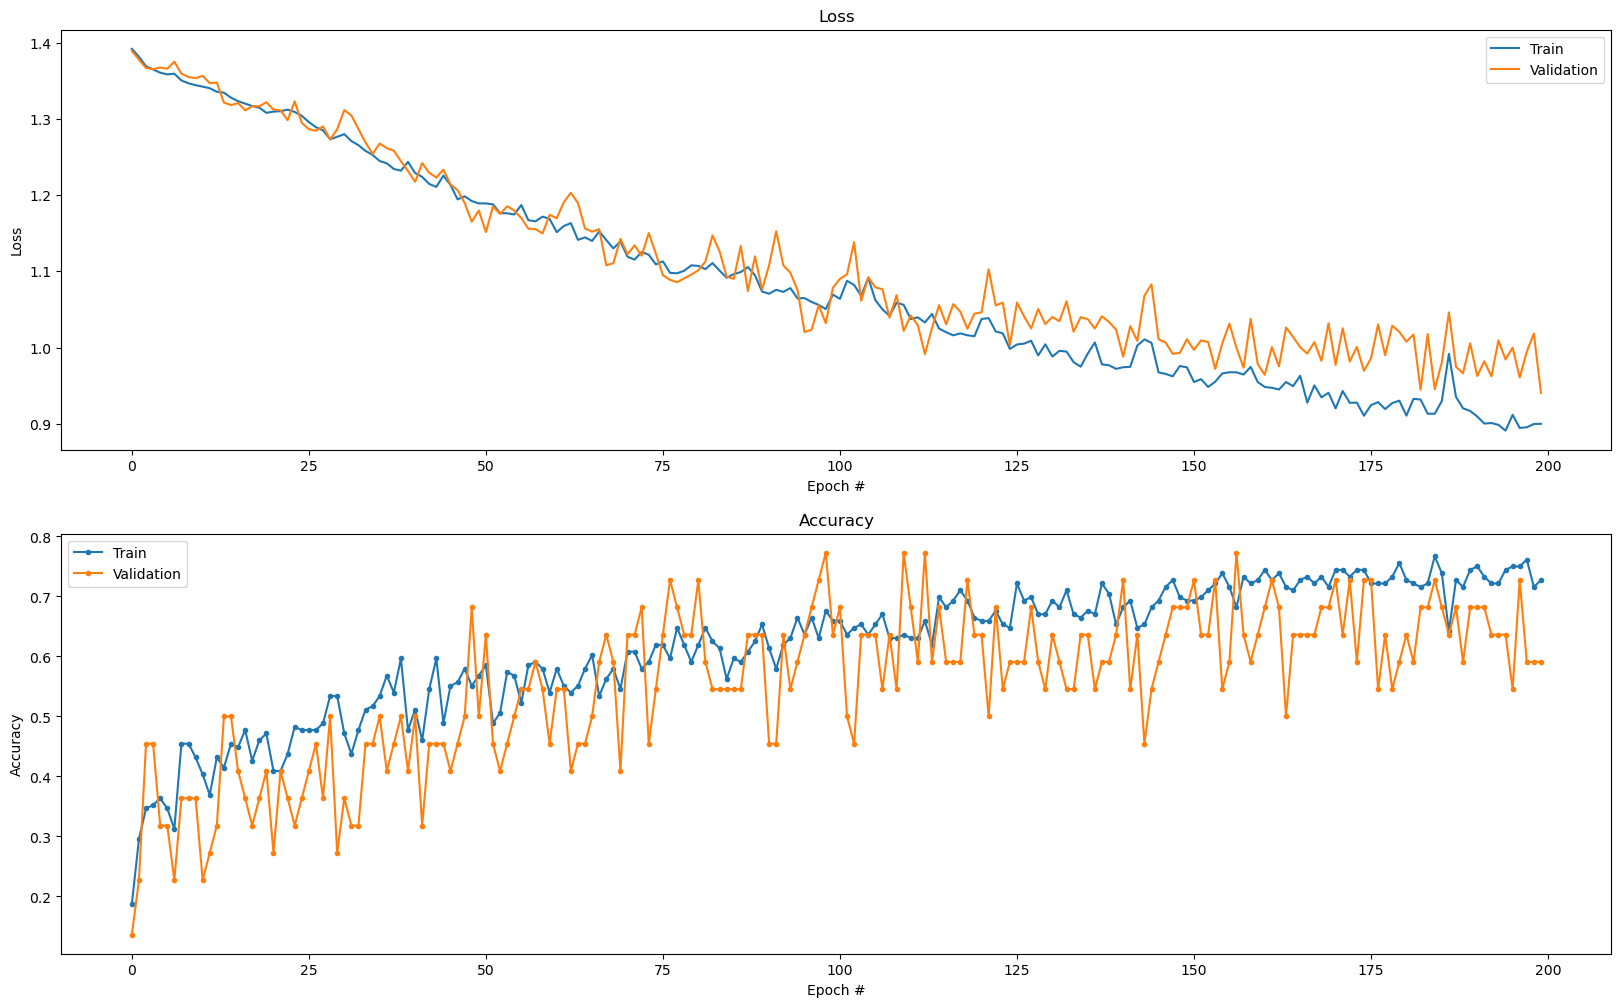

In [ ]:
model5 = GRUClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
).to(device)

print(model5(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model5, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model5, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=1.3991    Train Acc=0.2386    Val Loss=1.3441    Val Acc=0.3182
Epoch 1    Train Loss=1.3959    Train Acc=0.2330    Val Loss=1.3463    Val Acc=0.3182
Epoch 2    Train Loss=1.3927    Train Acc=0.2500    Val Loss=1.3475    Val Acc=0.3182
Epoch 3    Train Loss=1.3900    Train Acc=0.2500    Val Loss=1.3475    Val Acc=0.3182
Epoch 4    Train Loss=1.3873    Train Acc=0.2500    Val Loss=1.3462    Val Acc=0.2727
Epoch 5    Train Loss=1.3846    Train Acc=0.2330    Val Loss=1.3447    Val Acc=0.2727
Epoch 6    Train Loss=1.3817    Train Acc=0.2330    Val Loss=1.3450    Val Acc=0.3182
Epoch 7    Train Loss=1.3783    Train Acc=0.2500    Val Loss=1.3446    Val Acc=0.3182
Epoch 8    Train Loss=1.3759    Train Acc=0.2670    Val Loss=1.3449    Val Acc=0.3182
Epoch 9    Train Loss=1.3733    Train Acc=0.2784    Val Loss=1.3435    Val Acc=0.3182
Epoch 10    Train Loss=1.3712    Train Acc=0.2614    Val Loss=1.3419    Val Acc=0.2727
Epoch 11    Train

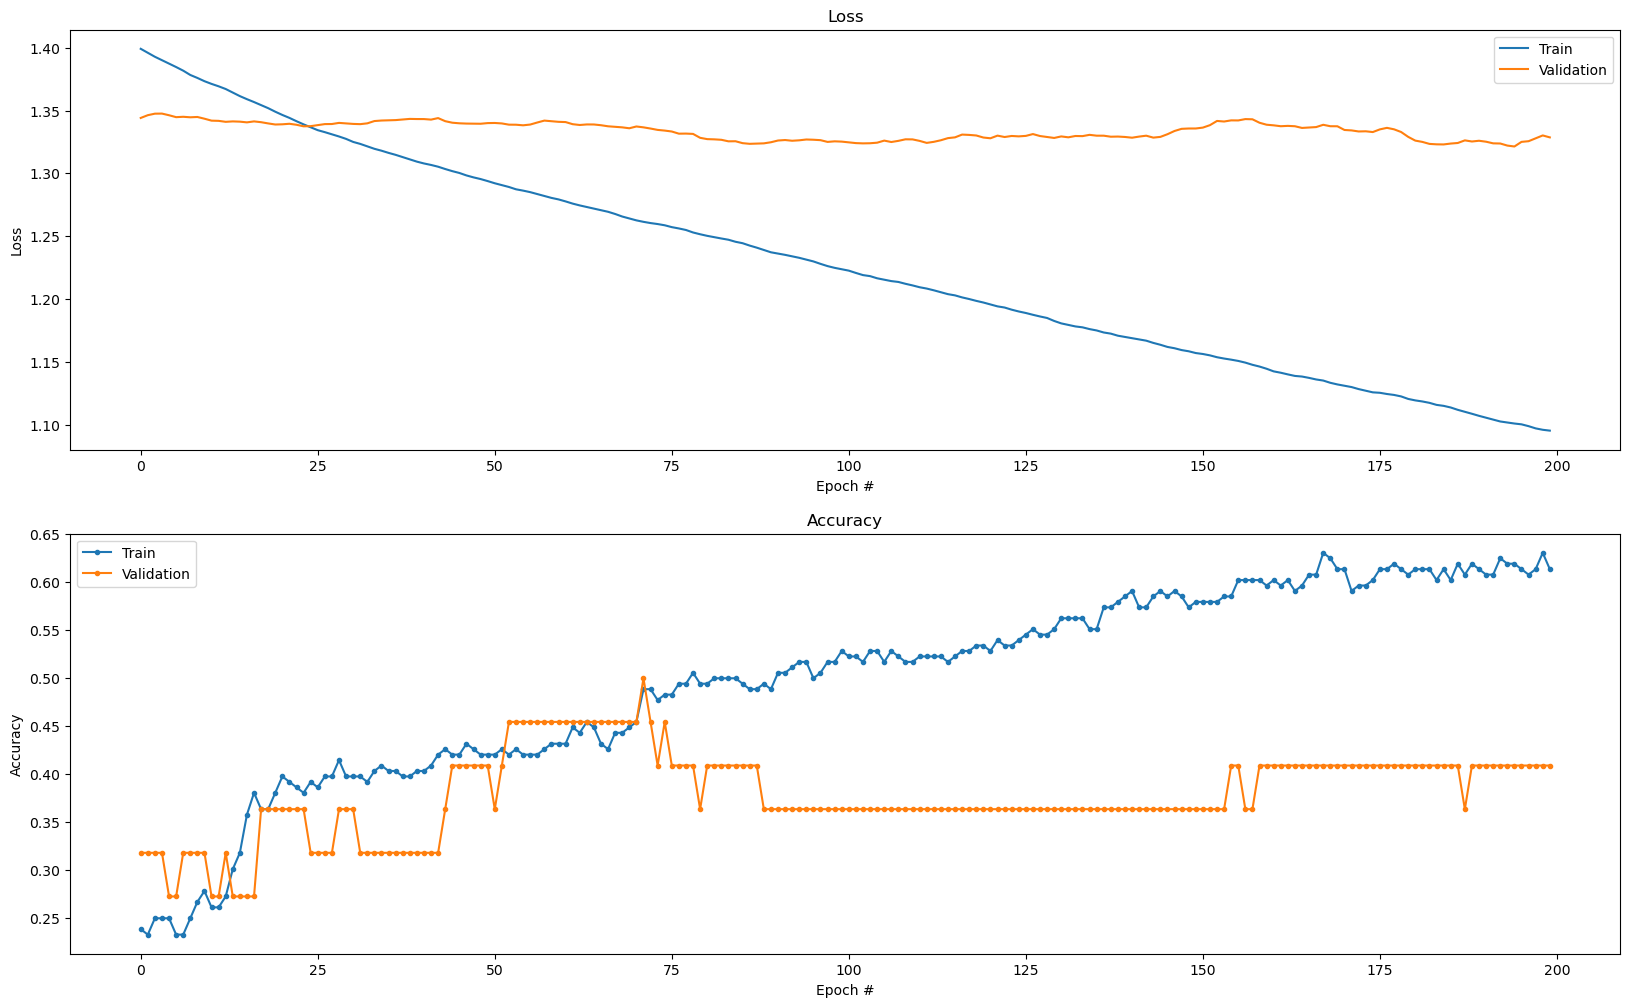

In [ ]:
### BEST MODEL  
model6 = GRUClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
).to(device)

print(model6(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model6, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model6, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=4.1391    Train Acc=0.2216    Val Loss=3.7420    Val Acc=0.4091
Epoch 1    Train Loss=3.3956    Train Acc=0.2386    Val Loss=3.0787    Val Acc=0.4091
Epoch 2    Train Loss=2.8902    Train Acc=0.2614    Val Loss=2.6099    Val Acc=0.4091
Epoch 3    Train Loss=2.4671    Train Acc=0.2557    Val Loss=2.3099    Val Acc=0.4091
Epoch 4    Train Loss=2.1123    Train Acc=0.2955    Val Loss=2.0698    Val Acc=0.3182
Epoch 5    Train Loss=1.8783    Train Acc=0.3068    Val Loss=1.8839    Val Acc=0.3636
Epoch 6    Train Loss=1.7647    Train Acc=0.3068    Val Loss=1.7895    Val Acc=0.3636
Epoch 7    Train Loss=1.6564    Train Acc=0.3295    Val Loss=1.6999    Val Acc=0.3182
Epoch 8    Train Loss=1.5998    Train Acc=0.3352    Val Loss=1.6528    Val Acc=0.3182
Epoch 9    Train Loss=1.5633    Train Acc=0.3750    Val Loss=1.6586    Val Acc=0.3182
Epoch 10    Train Loss=1.4975    Train Acc=0.3693    Val Loss=1.6096    Val Acc=0.3182
Epoch 11    Train

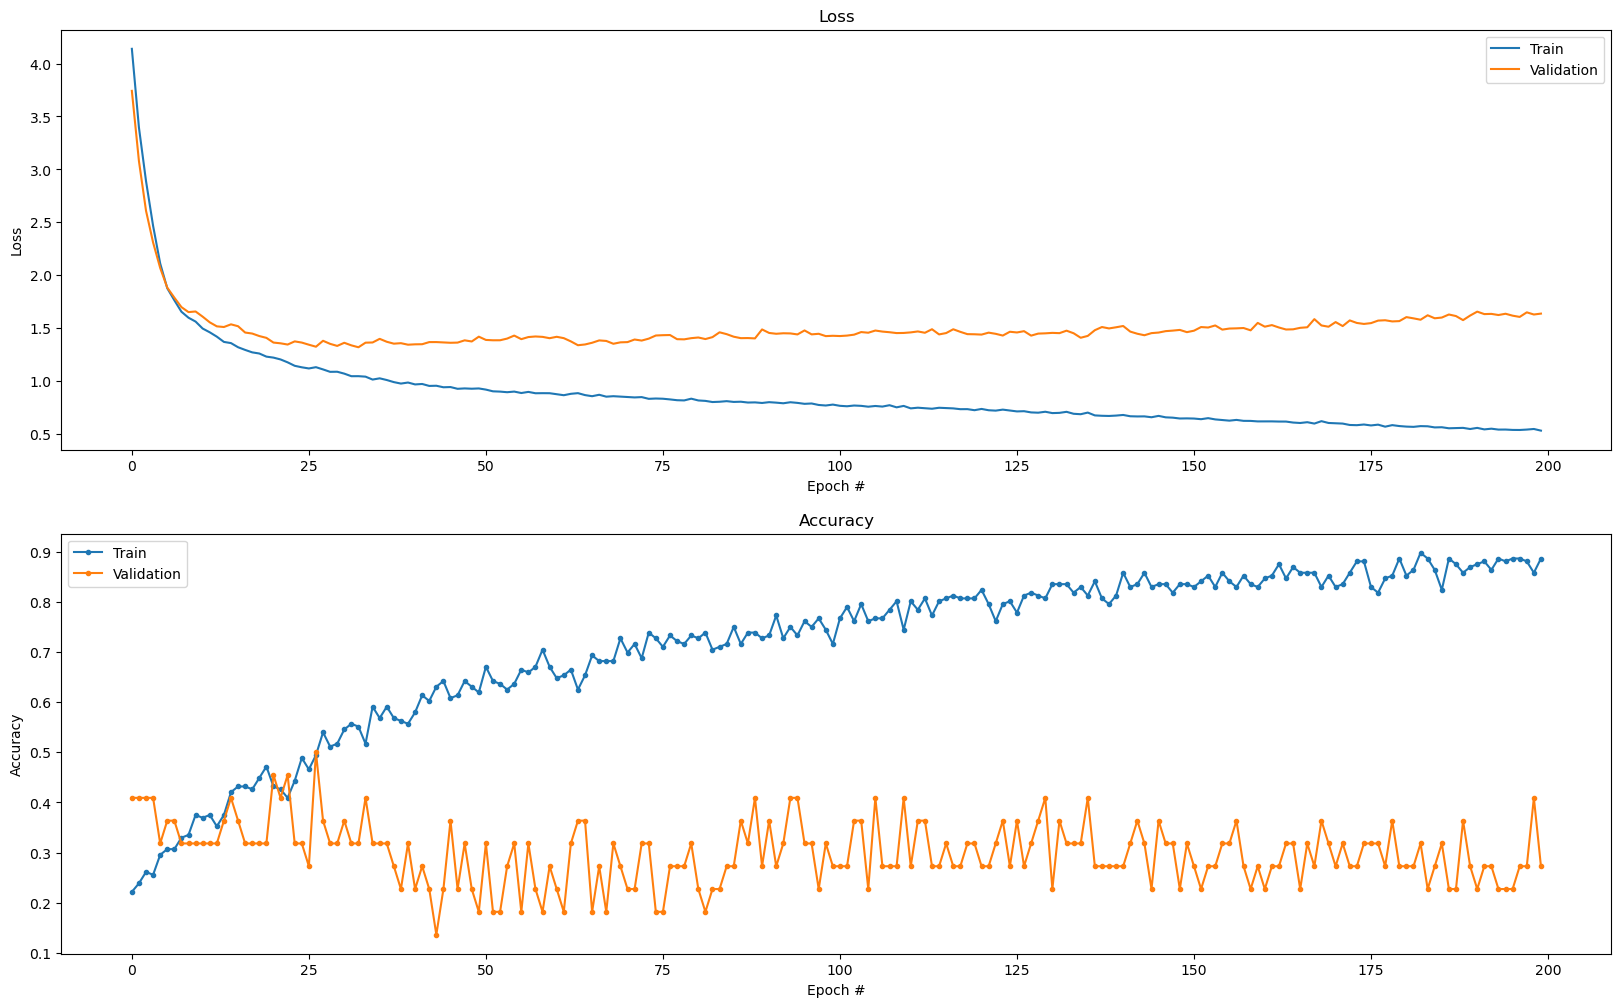

In [ ]:
model7 = LSTMClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=3,
    bidirectional=True
).to(device)

print(model7(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model7, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model7, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=2.4445    Train Acc=0.3693    Val Loss=2.3730    Val Acc=0.3182
Epoch 1    Train Loss=2.0006    Train Acc=0.4318    Val Loss=2.4024    Val Acc=0.3636
Epoch 2    Train Loss=1.4323    Train Acc=0.5341    Val Loss=1.5179    Val Acc=0.5000
Epoch 3    Train Loss=1.9693    Train Acc=0.3636    Val Loss=2.2847    Val Acc=0.3636
Epoch 4    Train Loss=1.4038    Train Acc=0.5511    Val Loss=2.0121    Val Acc=0.1364
Epoch 5    Train Loss=1.1399    Train Acc=0.5455    Val Loss=1.7465    Val Acc=0.4545
Epoch 6    Train Loss=1.3940    Train Acc=0.5057    Val Loss=1.9033    Val Acc=0.3636
Epoch 7    Train Loss=1.2961    Train Acc=0.5852    Val Loss=1.6329    Val Acc=0.4091
Epoch 8    Train Loss=0.9036    Train Acc=0.5852    Val Loss=1.2637    Val Acc=0.4091
Epoch 9    Train Loss=1.0850    Train Acc=0.5682    Val Loss=1.0369    Val Acc=0.5909
Epoch 10    Train Loss=0.7866    Train Acc=0.6420    Val Loss=1.1662    Val Acc=0.3636
Epoch 11    Train

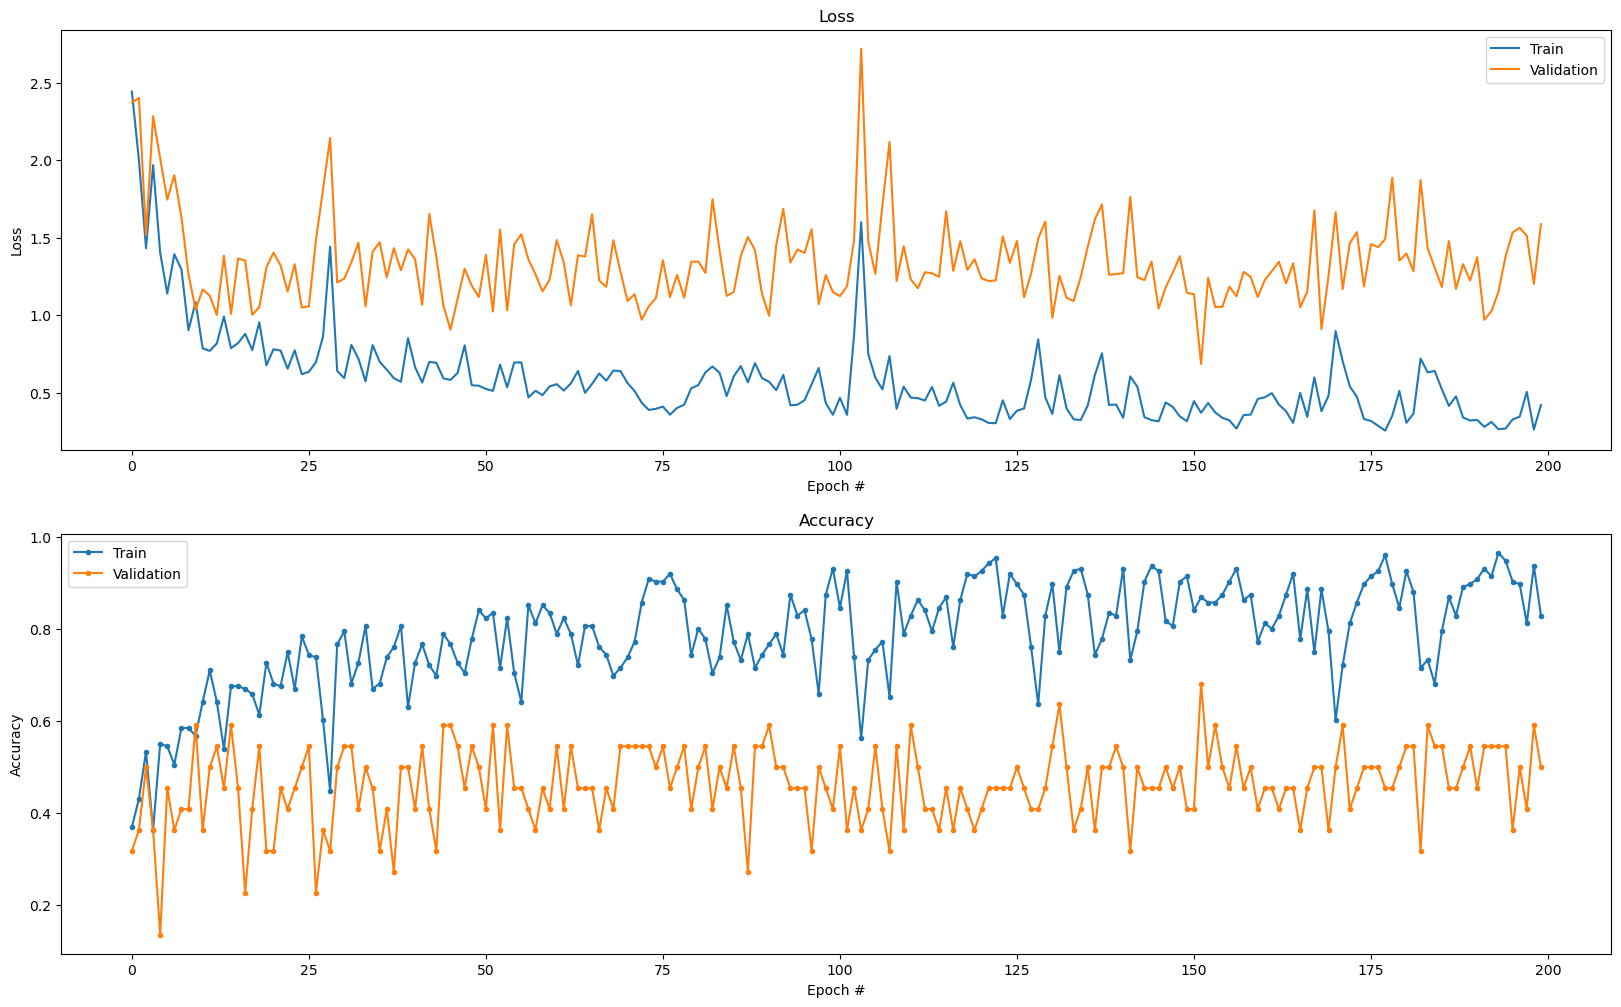

In [ ]:
model8 = LSTMClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=3,
    bidirectional=True
).to(device)

print(model8(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model8, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model8, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=1128.6038    Train Acc=0.3409    Val Loss=1128.5912    Val Acc=0.4091
Epoch 1    Train Loss=1077.1068    Train Acc=0.4943    Val Loss=1077.3461    Val Acc=0.3636
Epoch 2    Train Loss=1027.0580    Train Acc=0.6080    Val Loss=1027.4287    Val Acc=0.3182
Epoch 3    Train Loss=978.3021    Train Acc=0.6705    Val Loss=978.7213    Val Acc=0.4545
Epoch 4    Train Loss=930.7563    Train Acc=0.7443    Val Loss=931.2429    Val Acc=0.5000
Epoch 5    Train Loss=884.4503    Train Acc=0.8011    Val Loss=885.0057    Val Acc=0.5000
Epoch 6    Train Loss=839.3292    Train Acc=0.8409    Val Loss=839.9278    Val Acc=0.5455
Epoch 7    Train Loss=795.4052    Train Acc=0.8807    Val Loss=796.0532    Val Acc=0.5000
Epoch 8    Train Loss=752.6931    Train Acc=0.9091    Val Loss=753.3639    Val Acc=0.5000
Epoch 9    Train Loss=711.2034    Train Acc=0.9091    Val Loss=711.8837    Val Acc=0.5455
Epoch 10    Train Loss=670.9508    Train Acc=0.9432    Val

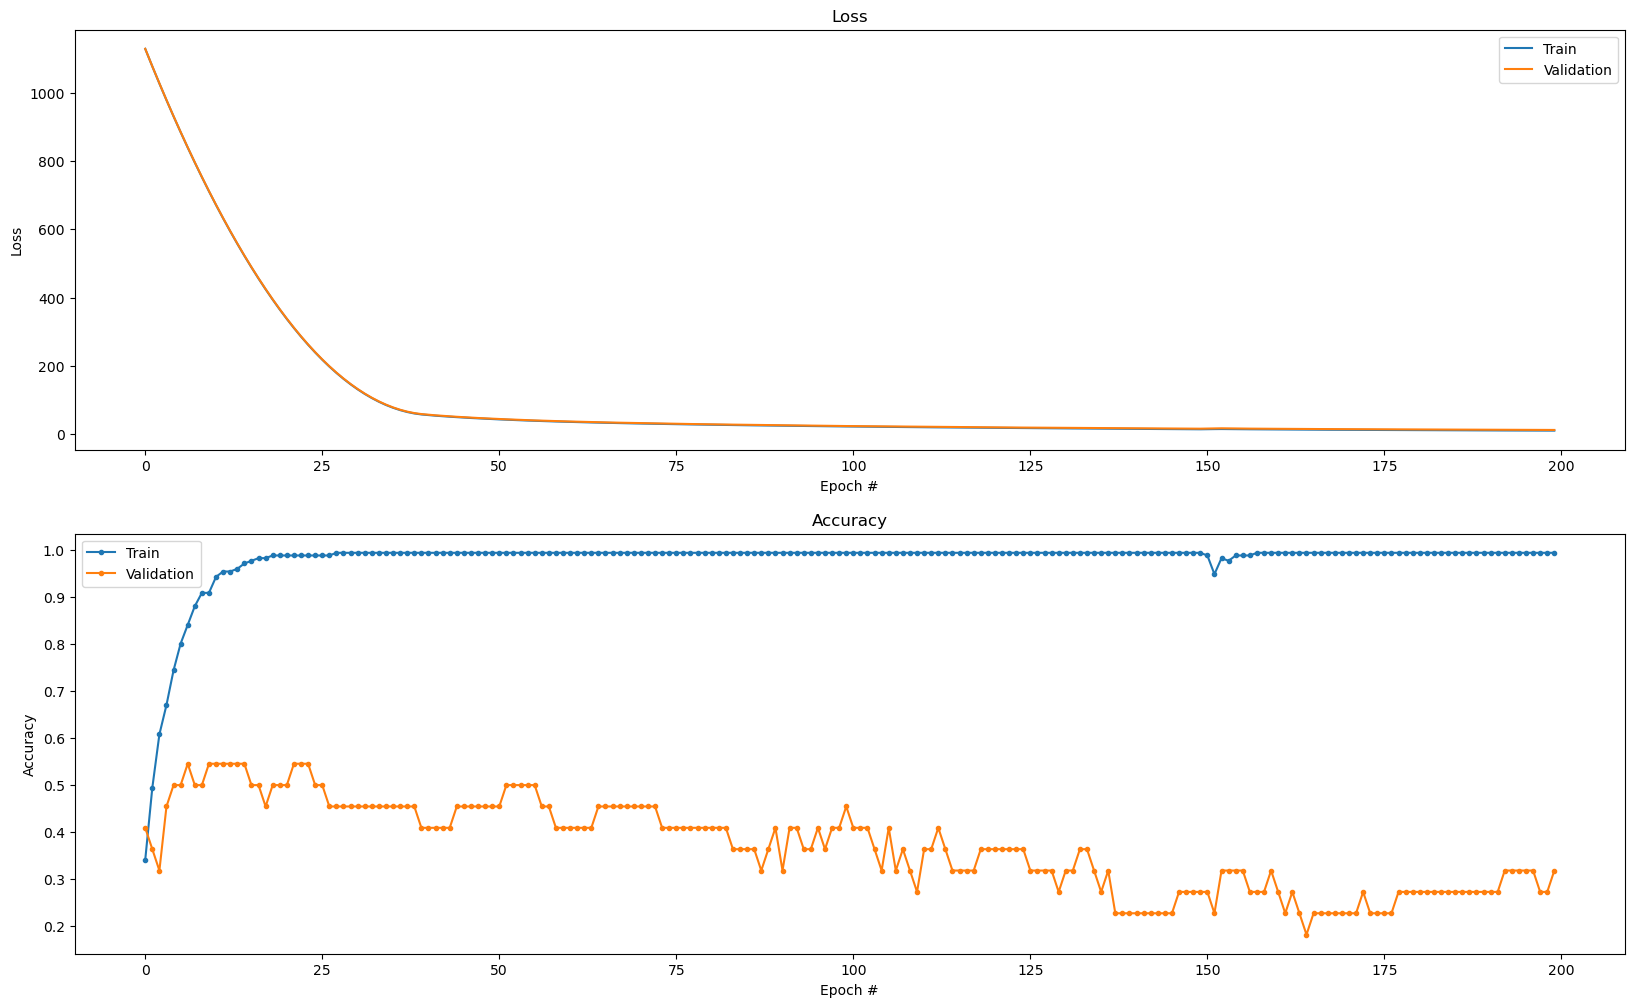

In [ ]:
model9 = LSTMClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=2,
    bidirectional=True
).to(device)

print(model9(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.1
l1_ratio = 0.1
lr = 0.0001

trainer.train(model9, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model9, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=46.0343    Train Acc=0.2273    Val Loss=45.9922    Val Acc=0.3636
Epoch 1    Train Loss=45.2716    Train Acc=0.2955    Val Loss=45.2401    Val Acc=0.3182
Epoch 2    Train Loss=44.5195    Train Acc=0.2898    Val Loss=44.4963    Val Acc=0.3182
Epoch 3    Train Loss=43.7764    Train Acc=0.3011    Val Loss=43.7609    Val Acc=0.4091
Epoch 4    Train Loss=43.0393    Train Acc=0.3182    Val Loss=43.0321    Val Acc=0.5000
Epoch 5    Train Loss=42.3107    Train Acc=0.3636    Val Loss=42.3102    Val Acc=0.4091
Epoch 6    Train Loss=41.5941    Train Acc=0.3750    Val Loss=41.5995    Val Acc=0.4091
Epoch 7    Train Loss=40.8858    Train Acc=0.4034    Val Loss=40.8968    Val Acc=0.4091
Epoch 8    Train Loss=40.1844    Train Acc=0.4091    Val Loss=40.2008    Val Acc=0.4091
Epoch 9    Train Loss=39.4928    Train Acc=0.4659    Val Loss=39.5143    Val Acc=0.4091
Epoch 10    Train Loss=38.8118    Train Acc=0.4602    Val Loss=38.8353    Val Acc=0.

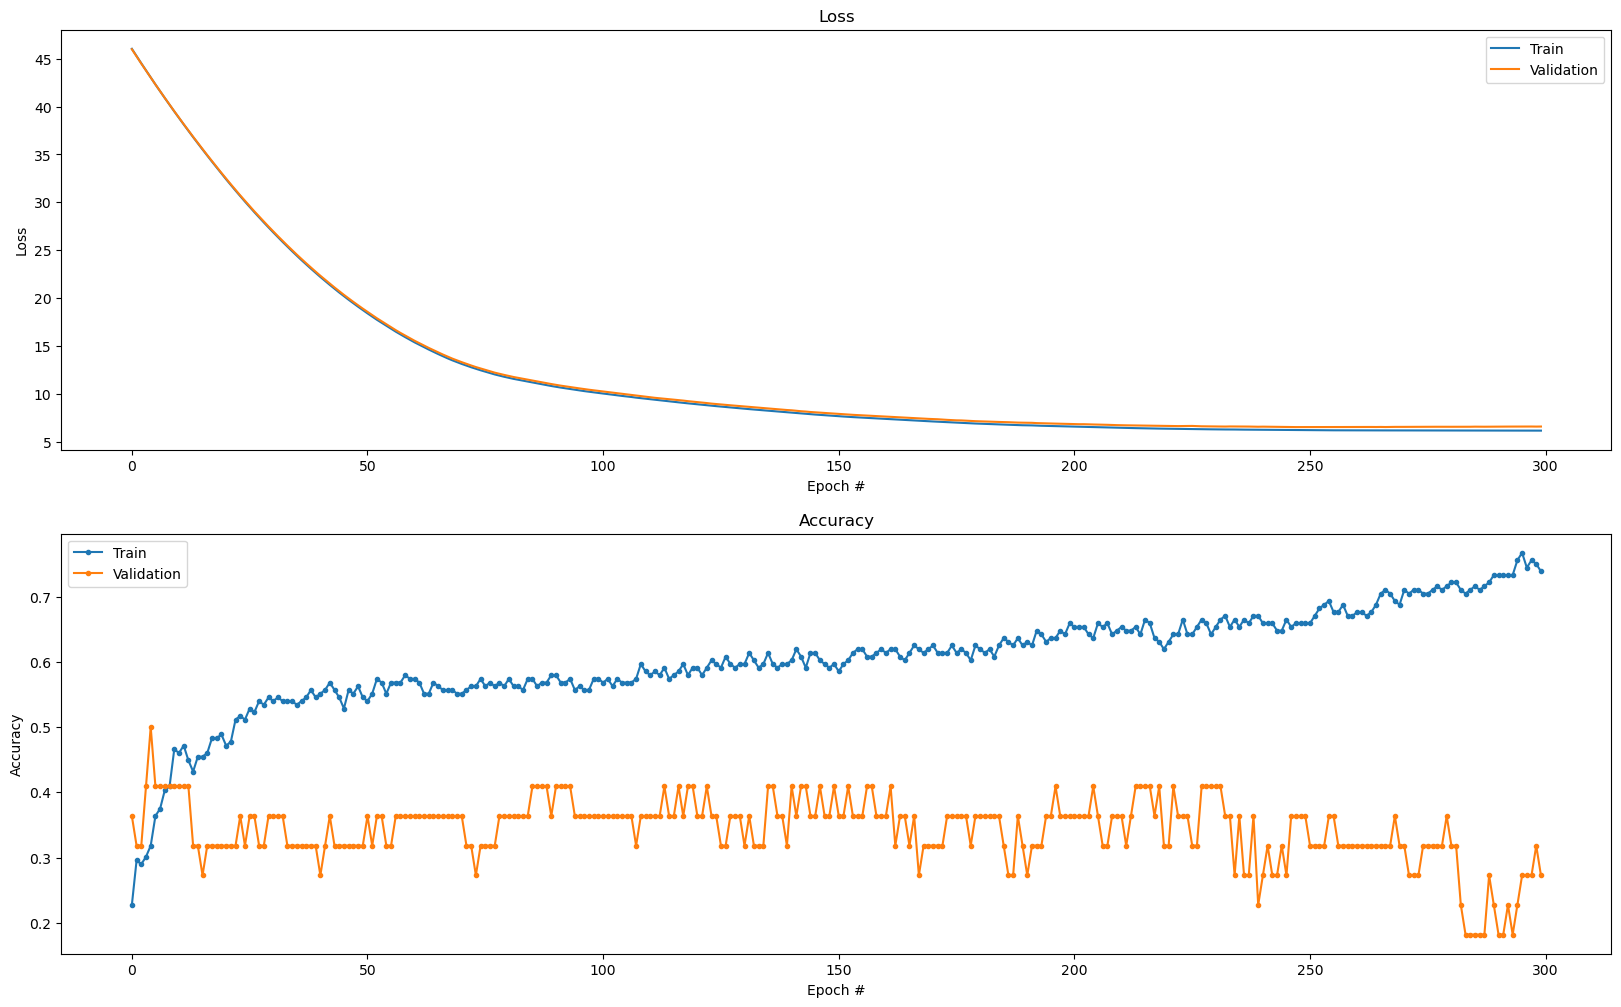

In [ ]:
model10 = GRUClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=2,
    bidirectional=True
).to(device)

print(model10(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 300
lam = 0.3
l1_ratio = 0.2
lr = 0.0002

trainer.train(model10, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model10, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=149.1591    Train Acc=0.3920    Val Loss=149.1757    Val Acc=0.3182
Epoch 1    Train Loss=145.2098    Train Acc=0.2727    Val Loss=145.2045    Val Acc=0.3182
Epoch 2    Train Loss=141.3100    Train Acc=0.3977    Val Loss=141.3150    Val Acc=0.3636
Epoch 3    Train Loss=137.4891    Train Acc=0.4773    Val Loss=137.5101    Val Acc=0.4091
Epoch 4    Train Loss=133.7513    Train Acc=0.4318    Val Loss=133.7787    Val Acc=0.3636
Epoch 5    Train Loss=130.0941    Train Acc=0.4886    Val Loss=130.1194    Val Acc=0.3636
Epoch 6    Train Loss=126.5156    Train Acc=0.3750    Val Loss=126.5420    Val Acc=0.4091
Epoch 7    Train Loss=123.0042    Train Acc=0.4205    Val Loss=123.0433    Val Acc=0.3182
Epoch 8    Train Loss=119.5573    Train Acc=0.5227    Val Loss=119.5952    Val Acc=0.3636
Epoch 9    Train Loss=116.1831    Train Acc=0.4545    Val Loss=116.2457    Val Acc=0.2727
Epoch 10    Train Loss=112.8776    Train Acc=0.5284    Val Loss=

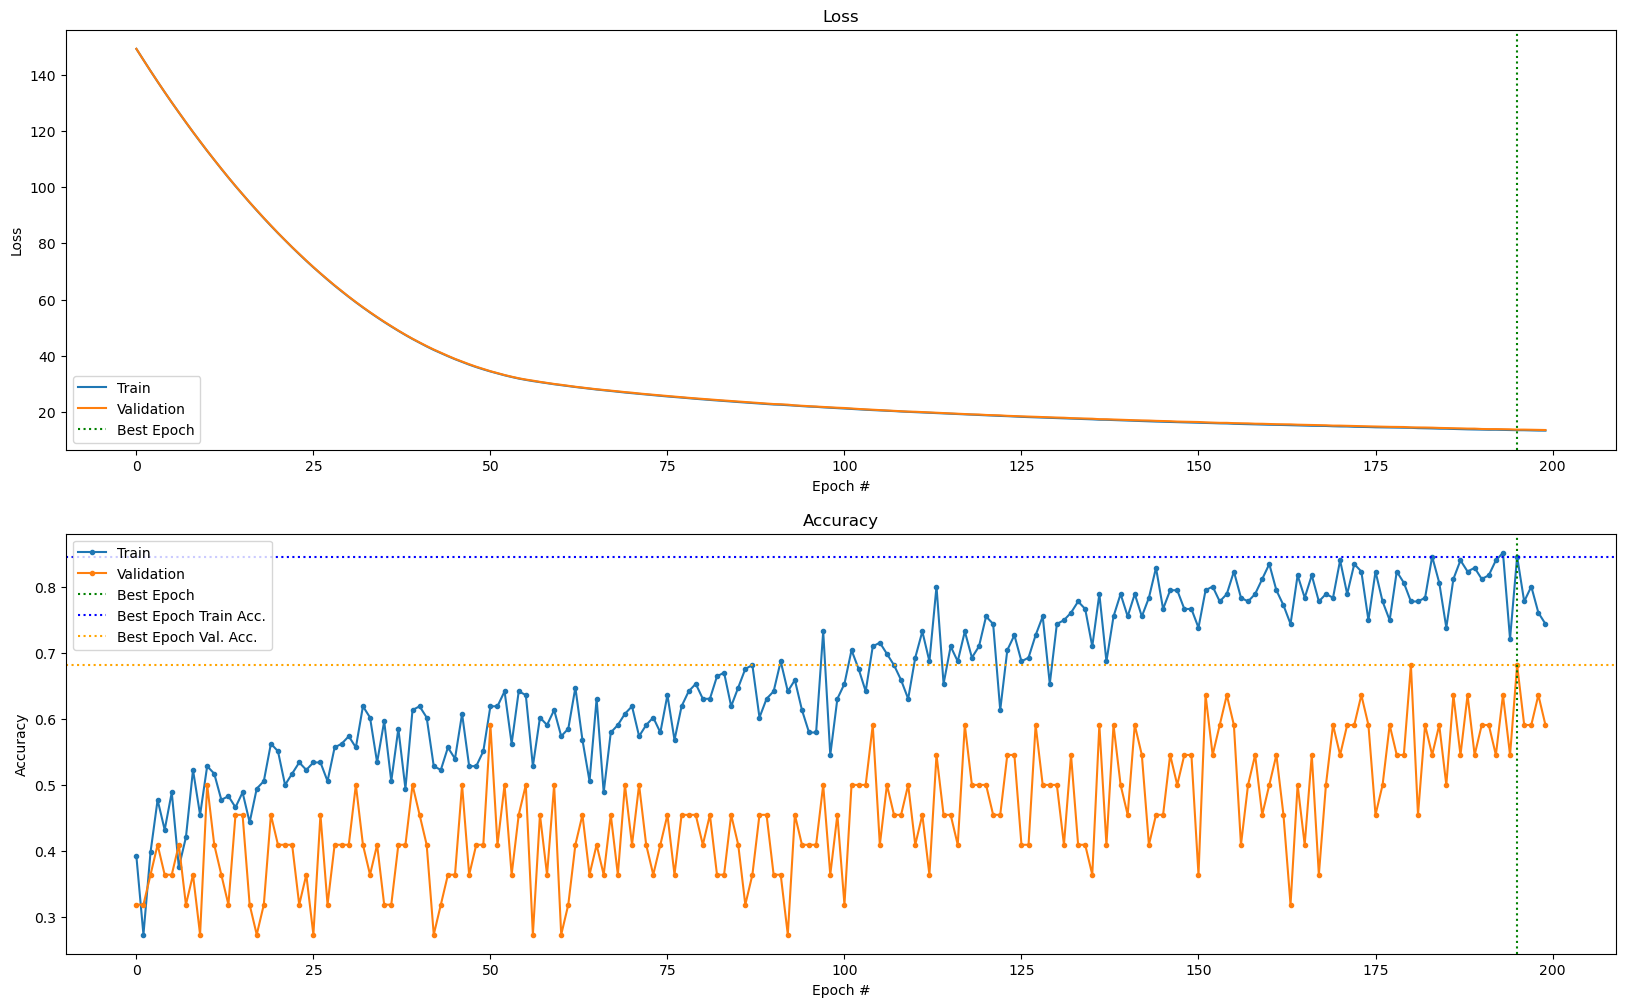

In [ ]:
model11 = GRUClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=3,
    bidirectional=True
).to(device)

print(model11(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.1
l1_ratio = 0.1
lr = 0.0001

trainer.train(model11, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model11, test_dset))

torch.Size([176, 4])
Training start
Epoch 0    Train Loss=10652.4834    Train Acc=0.3409    Val Loss=10652.5303    Val Acc=0.1818
Epoch 1    Train Loss=10122.1182    Train Acc=0.3977    Val Loss=10122.1846    Val Acc=0.2273
Epoch 2    Train Loss=9605.7256    Train Acc=0.4602    Val Loss=9605.8154    Val Acc=0.3182
Epoch 3    Train Loss=9103.3457    Train Acc=0.5170    Val Loss=9103.4463    Val Acc=0.2727
Epoch 4    Train Loss=8614.9004    Train Acc=0.5739    Val Loss=8615.0273    Val Acc=0.2727
Epoch 5    Train Loss=8140.3193    Train Acc=0.6477    Val Loss=8140.4614    Val Acc=0.2273
Epoch 6    Train Loss=7679.5967    Train Acc=0.7045    Val Loss=7679.7529    Val Acc=0.2727
Epoch 7    Train Loss=7232.5288    Train Acc=0.7386    Val Loss=7232.6904    Val Acc=0.2727
Epoch 8    Train Loss=6799.2500    Train Acc=0.7386    Val Loss=6799.4258    Val Acc=0.1818
Epoch 9    Train Loss=6379.7710    Train Acc=0.7784    Val Loss=6379.9585    Val Acc=0.1364
Epoch 10    Train Loss=5973.9277    Trai

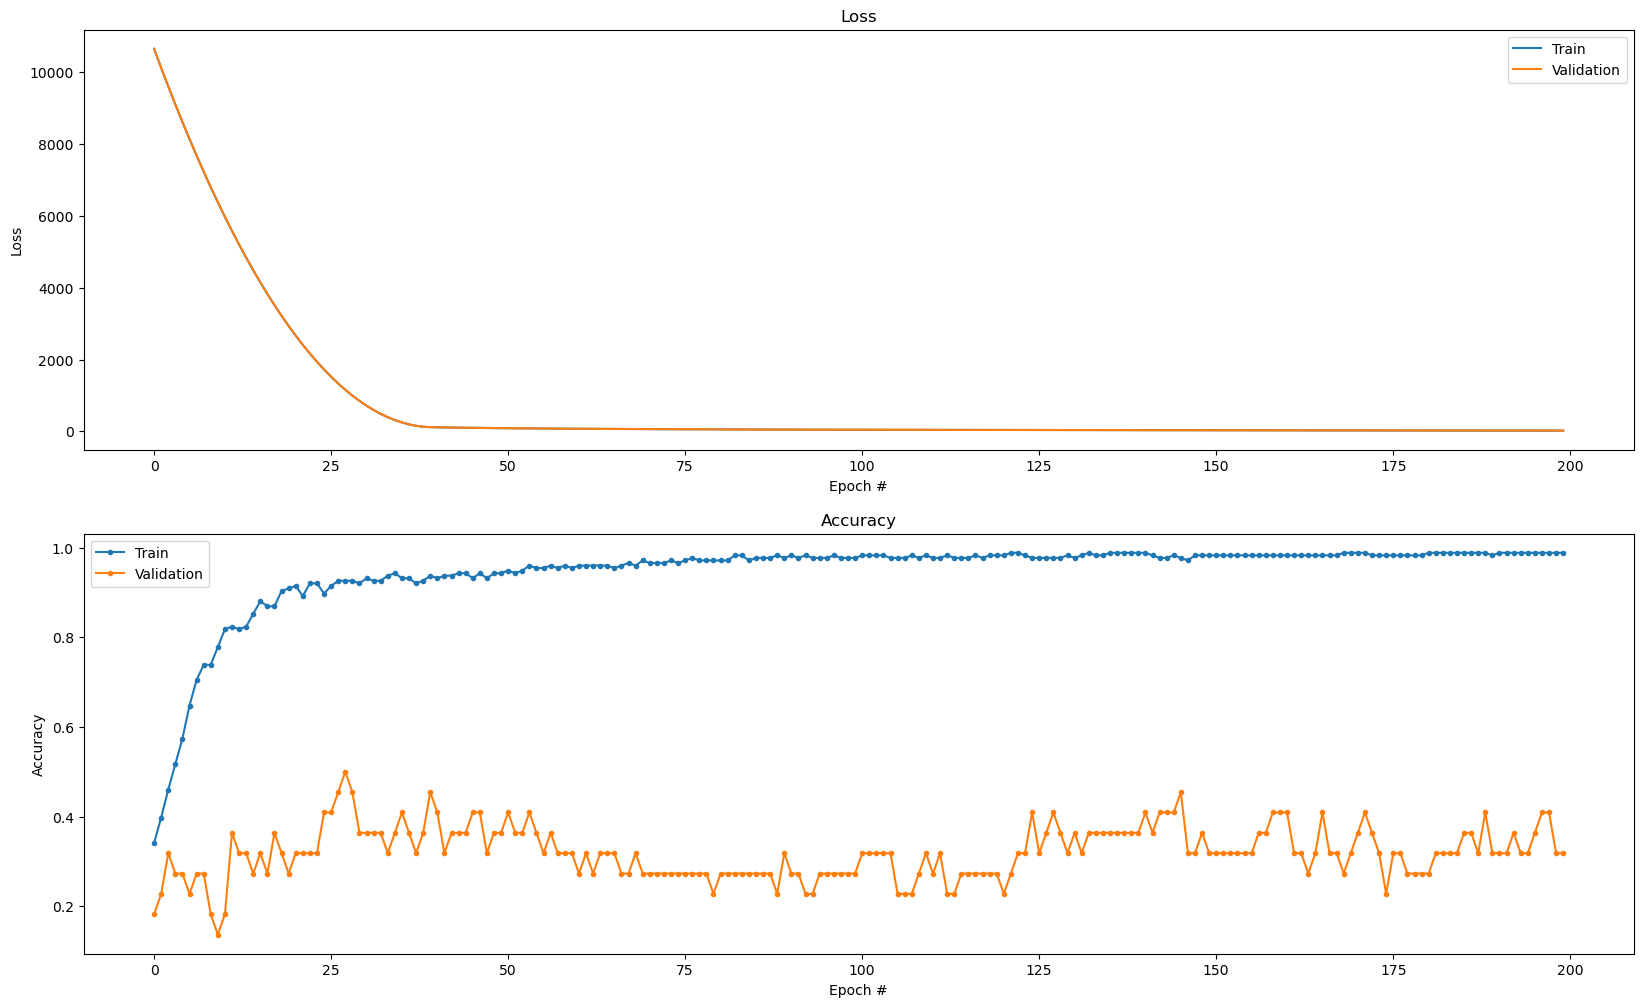

In [ ]:
model12 = GRUClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model12(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.5
l1_ratio = 0.3
lr = 0.0001

trainer.train(model12, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=False)

print(trainer.evaluate_performance(model12, test_dset))

In [ ]:
# Collate Function
def collate_fn(batch):
    waveforms, labels = zip(*batch)
    waveforms = torch.nn.utils.rnn.pad_sequence(waveforms, batch_first=True)
    labels = torch.tensor(labels)
    return waveforms, labels

# # Audio preprocessing
# class Stereo2Mono(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.weights = torch.tensor([0.5, 0.5], requires_grad=False).view(2, 1)

#     def forward(self, waveform: torch.Tensor) -> torch.Tensor:
#         if waveform.shape[0] == 2:
#             return torch.sum(waveform * self.weights, dim=0) * np.sqrt(2)
#         return waveform

# def path_to_waveform_tensor(path: str, sample_rate=44100):
#     waveform, sr = torchaudio.load(path)
#     if sr != sample_rate:
#         waveform = torchaudio.transforms.Resample(sr, sample_rate)(waveform)
#     mono_wf = Stereo2Mono()(waveform)
#     return mono_wf.squeeze(0).cpu()

# def split_waveform_segments(wf: torch.Tensor, target_len=TARGET_AUDIO_LENGTH, min_length: int=TARGET_SAMPLE_RATE * 10, train: bool=False):
#     wf_len = wf.shape[0]
#     if wf_len < target_len:
#         return [wf.detach().clone()] if wf_len >= min_length else []
#     else:
#         hop_length = target_len // 2 if train else target_len
#         segments = []
#         for i in range(0, wf_len, hop_length):
#             if wf_len - i > target_len:
#                 segments.append(wf[i:i+target_len])
#             elif wf_len - i >= min_length:
#                 segments.append(wf[-target_len if train else i:])
#         return segments

# Dataset
class AudioEmotionDataset(Dataset):
    def __init__(self, dataframe, data_dir, train=True):
        self.dataframe = dataframe
        self.data_dir = data_dir
        self.train = train
        self.data = []
        self.labels = []
        self.prepare_dataset()

    def prepare_dataset(self):
        for _, row in tqdm(self.dataframe.iterrows(), total=len(self.dataframe)):
            audio_path = os.path.join(self.data_dir, row["File"])
            label = LABEL_TO_INT[row["Emotion"]]
            try:
                wf = path_to_waveform_tensor(audio_path)
                segments = split_waveform_segments(wf, train=self.train)
                self.data.extend(segments)
                self.labels.extend([label] * len(segments))
            except Exception as e:
                print(f"Error loading {audio_path}: {e}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y


class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.melspec = torchaudio.transforms.MelSpectrogram(
            sample_rate=TARGET_SAMPLE_RATE, n_mels=128, n_fft=4096, center=True
        )
        # Ensure that the tensor is moved to CPU before applying librosa function
        self.norm = lambda x: torch.from_numpy(librosa.power_to_db(x.cpu().numpy(), ref=np.max))

    def forward(self, x):
        x = self.melspec(x)
        x = self.norm(x)
        return x

# Positional encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=2000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Improved Transformer
class ImprovedEmotionTransformer(nn.Module):
    def __init__(self, input_dim=128, num_classes=4, d_model=128, nhead=8, num_layers=4, dropout=0.7):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.dropout = nn.Dropout(dropout)
        self.fc_out = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)               # (B, T, F)
        x = self.input_proj(x)               # (B, T, D)
        x = self.pos_encoder(x)
        x = x.permute(1, 0, 2)               # (T, B, D)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)                    # (B, D)
        x = self.dropout(x)
        return self.fc_out(x)


NameError: name 'Dataset' is not defined

In [ ]:
# class ImprovedEmotionTransformer(torch.nn.Module):
#     def __init__(self, input_dim=128, num_classes=4, d_model=128, nhead=8, num_layers=4, dropout=0.7):
#         super().__init__()
#         self.input_proj = torch.nn.Linear(input_dim, d_model)
#         self.pos_encoder = PositionalEncoding(d_model)

#         encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

#         self.dropout = nn.Dropout(dropout)
#         self.fc_out = nn.Linear(d_model, num_classes)

#     def forward(self, x):
#         x = x.permute(0, 2, 1)               # (B, T, F)
#         x = self.input_proj(x)               # (B, T, D)
#         x = self.pos_encoder(x)
#         x = x.permute(1, 0, 2)               # (T, B, D)
#         x = self.transformer_encoder(x)
#         x = x.mean(dim=0)                    # (B, D)
#         x = self.dropout(x)
#         return self.fc_out(x)